In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_grades

In [4]:
plt.rc('font', size = 13)
plt.rc('figure', figsize = (13, 7))

In [5]:
df = wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [6]:
from sklearn.model_selection import train_test_split

In [8]:
train_and_validate, test = train_test_split(df, test_size = .1, random_state = 123)
train, validate = train_test_split(train_and_validate, test_size = .1, random_state= 123)

train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

In [9]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


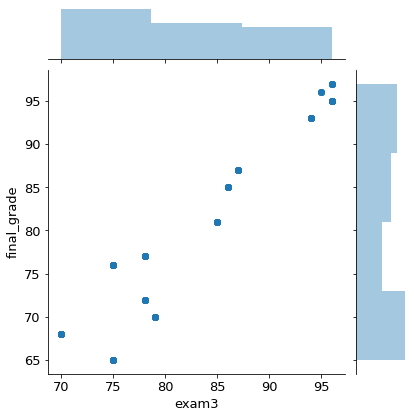

In [14]:
sns.jointplot(x = 'exam3', y= 'final_grade', data = train)

# Thoughts
Is there a stronger correlation between exams 1 and 3 and final grades commpared to exam 2?

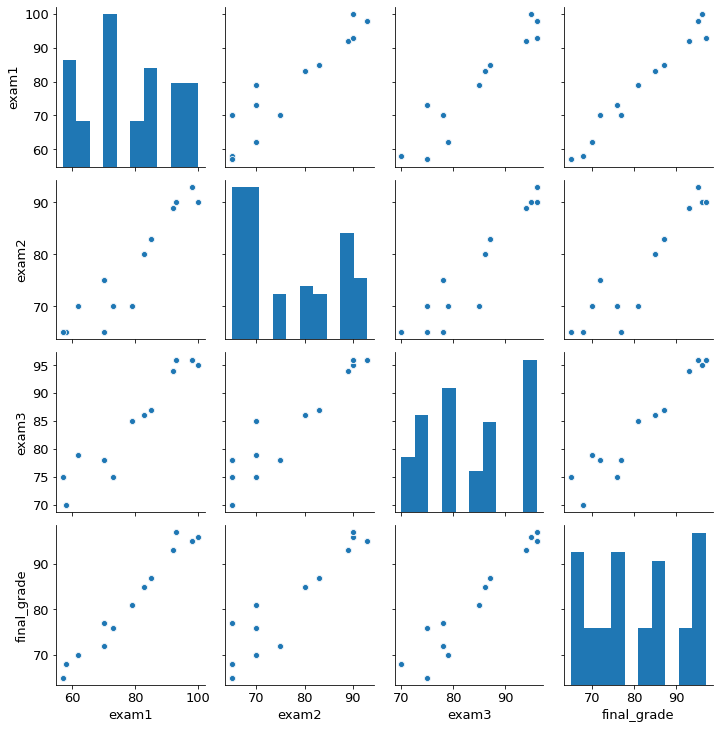

In [15]:
sns.pairplot(train)

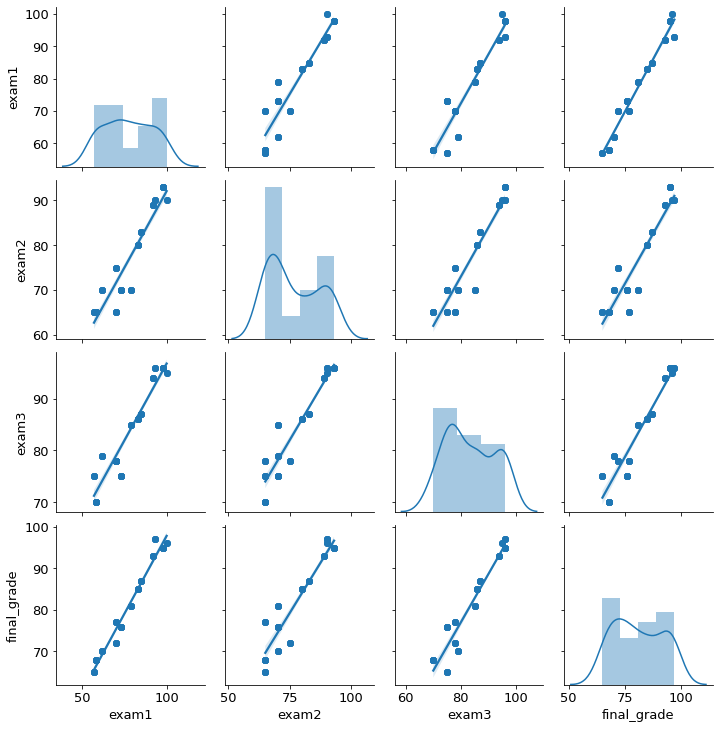

In [18]:
g = sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot)

In [19]:
df.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.933423,0.951743,0.983944
exam2,0.933423,1.000000,0.938773,0.926679
exam3,0.951743,0.938773,1.000000,0.959412
final_grade,0.983944,0.926679,0.959412,1.000000


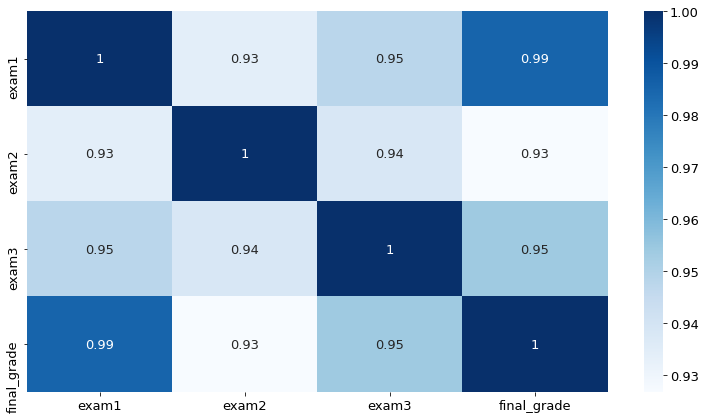

In [20]:
sns.heatmap(train.corr(), cmap = 'Blues', annot = True)

# Takeaways
-Exam 2 is the least correlated

-Exam 1 is the most correlated

In [21]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


In [26]:
train['exam1_letter_grade'] = pd.cut(train.exam1, bins = [0, 60, 70, 80, 90, 105], labels= ['F','D', 'C', 'B', 'A'])

<ipython-input-26-5dfd37cfb8dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['exam1_letter_grade'] = pd.cut(train.exam1, bins = [0, 60, 70, 80, 90, 105], labels= ['F','D', 'C', 'B', 'A'])


In [27]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A
20,73,70,75,76,C
78,100,90,95,96,A
29,83,80,86,85,B
75,58,65,70,68,F


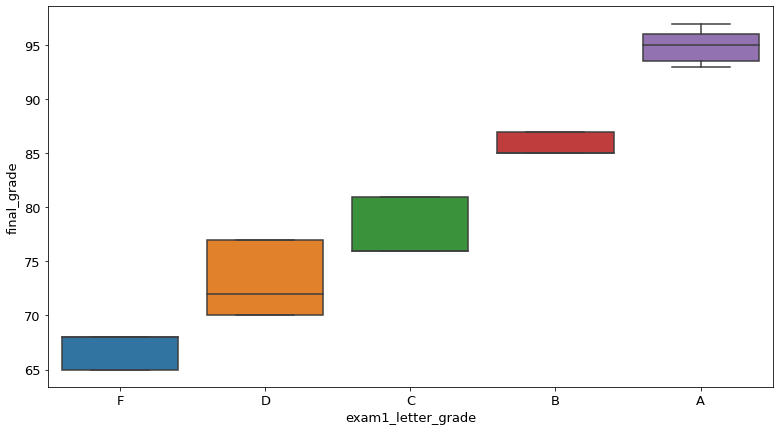

In [28]:
sns.boxplot(data=train, y='final_grade', x= 'exam1_letter_grade')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

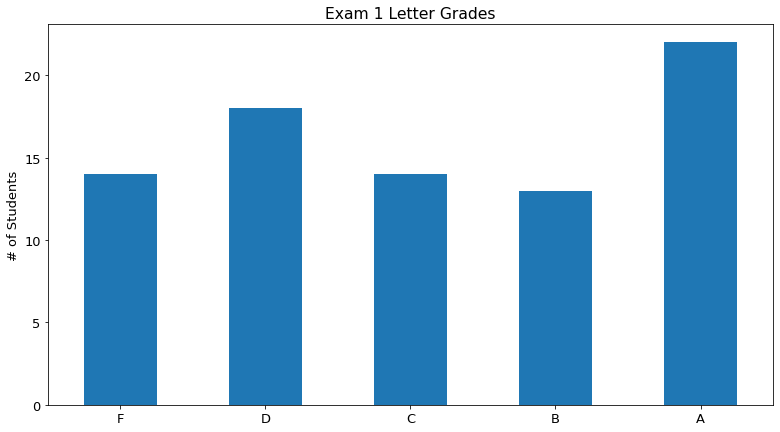

In [37]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar()
plt.ylabel('# of Students')
plt.title('Exam 1 Letter Grades')
plt.xticks(rotation=0)

In [39]:
np.random.seed(123)
train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])
train.head()

<ipython-input-39-eaba34133f28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])


,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,Two
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,F,One


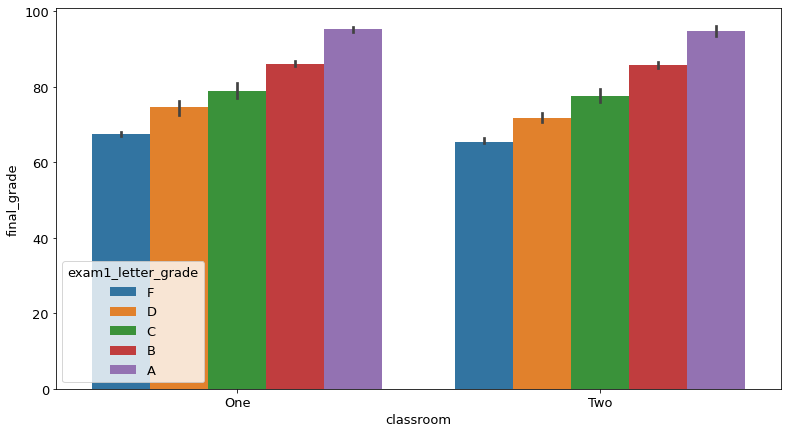

In [41]:
sns.barplot(data= train, y = 'final_grade', x= 'classroom', hue = 'exam1_letter_grade')

alpha = .05
- $H_0$: There is no difference in final grade between classroom one and two
- $H_a$: There is a difference in final grade between classroom one and two

In [43]:
from scipy import stats
stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var = False)

Ttest_indResult(statistic=2.280491002945514, pvalue=0.025327198363860267)

P-value of .025, we reject the null hypothesis that there is no difference in final grade between classroom one and classroom two

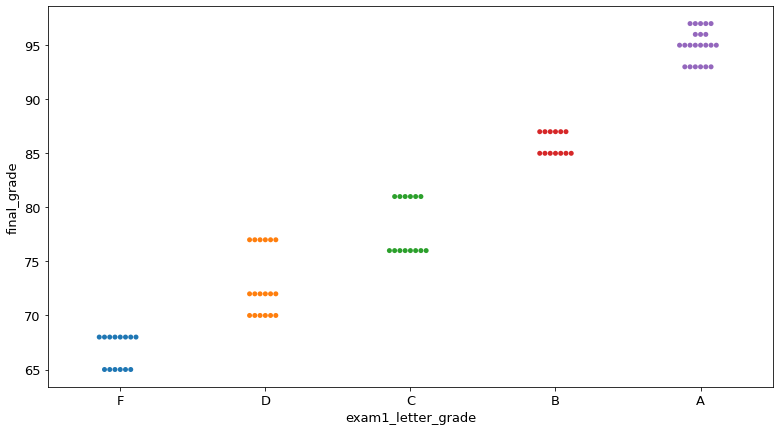

In [44]:
sns.swarmplot(data=train, y= 'final_grade', x= 'exam1_letter_grade')

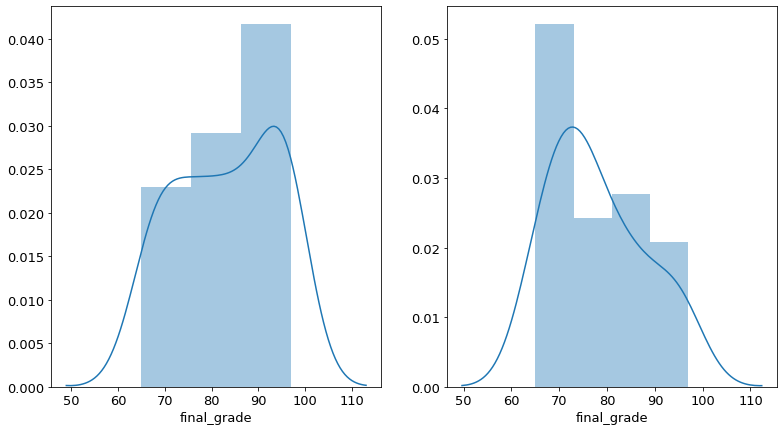

In [46]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)

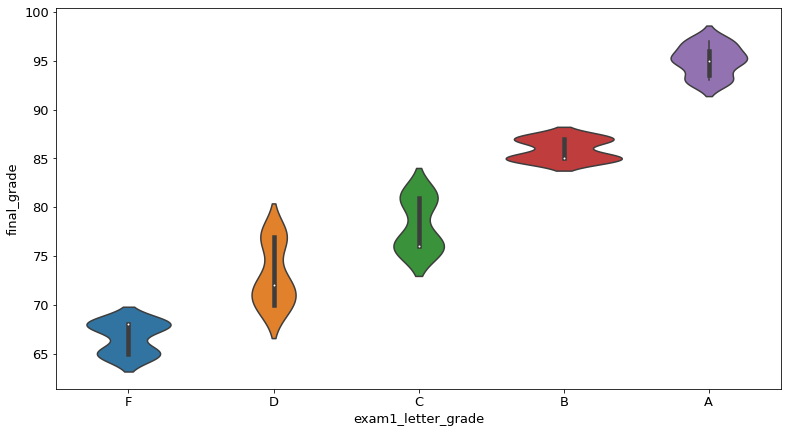

In [50]:
sns.violinplot(data=train, y='final_grade', x= 'exam1_letter_grade')

In [56]:
pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True).round(3)

classroom,One,Two
exam1_letter_grade,,
F,0.099,0.074
D,0.099,0.123
C,0.062,0.111
B,0.099,0.062
A,0.198,0.074


In [55]:
pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True).applymap('{:.1%}'.format)

classroom,One,Two
exam1_letter_grade,,
F,9.9%,7.4%
D,9.9%,12.3%
C,6.2%,11.1%
B,9.9%,6.2%
A,19.8%,7.4%


In [59]:
pd.crosstab(train.classroom, train.exam1_letter_grade, normalize='columns').applymap('{:.1%}'.format)

exam1_letter_grade,F,D,C,B,A
classroom,,,,,
One,57.1%,44.4%,35.7%,61.5%,72.7%
Two,42.9%,55.6%,64.3%,38.5%,27.3%
